# Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import xgboost as xgb

import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import model_selection, feature_selection, metrics, linear_model, svm, tree, neighbors, ensemble

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

from pandas.tools.plotting import scatter_matrix

print("Libraries imported")

Libraries imported


# Data Exploration

The given data does not have any missing values and categorical variables. So, we don't need to perform preprocessing steps like imputation of missing values and encoding the categorical features. However, the values of different variables are in different scales. Hence, we can perform feature scaling for faster convergence of the algorithm.

In [2]:
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

full_data = [train_data, test_data]

train_data.info()

test_data.info()

test_id = test_data['Id']

print(train_data.describe())

print(train_data.head(10))

print(test_data.head(10))

print("Train data nulls: \n", train_data.isnull().sum())

print("Test data nulls: \n", test_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357336 entries, 0 to 4357335
Data columns (total 26 columns):
Id                 int64
groupId            int64
matchId            int64
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
maxPlace           int64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(20)
memory usage: 864.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867913 entries, 0 to 1867912
Data columns (total 25 columns):
Id                 int64
groupId            int64
matchId  

Train data nulls: 
 Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64
Test data nulls: 
 Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swi

# Data Visualizations

Text(0,0.5,'No. of weapons')

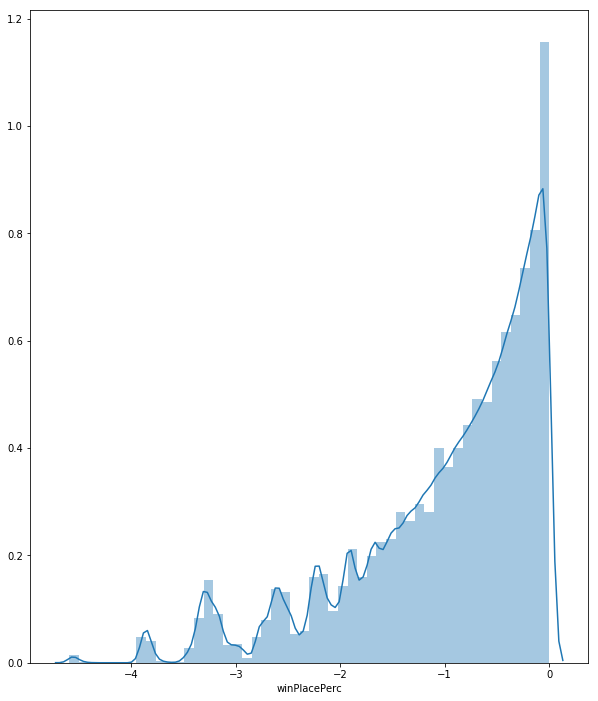

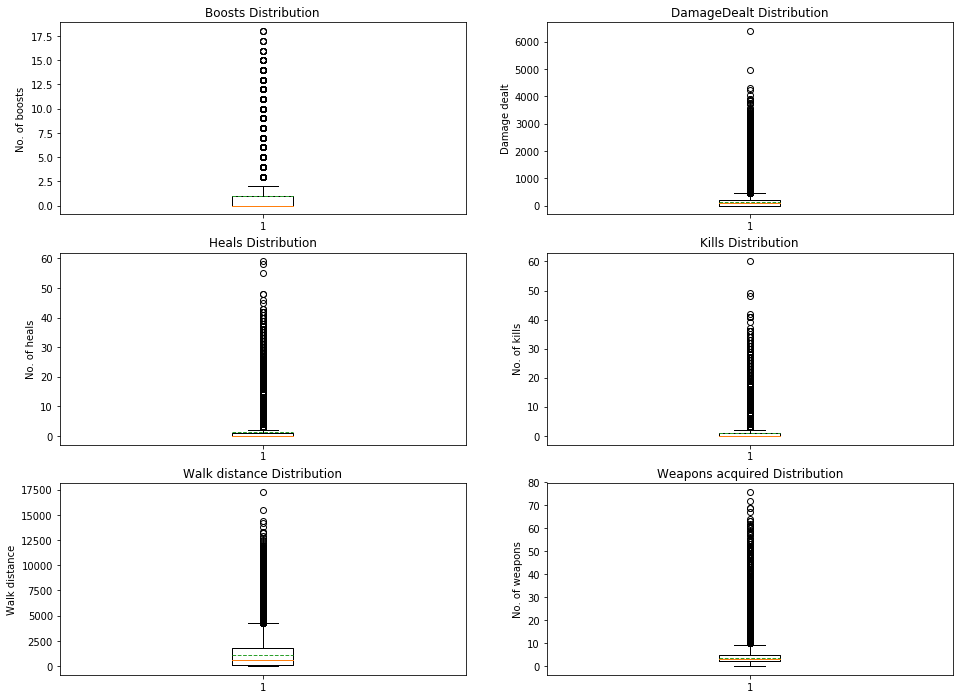

In [3]:
# To observe the distribution of target variable
fig, ax1 = plt.subplots(figsize = [10,12])

sns.distplot(np.log(train_data[train_data['winPlacePerc']!=0]['winPlacePerc']), ax=ax1)

# Visualising the distribution of important variables

plt.figure(figsize = [16,12])

plt.subplot(321)

plt.boxplot(train_data['boosts'],showmeans=True,meanline=True)
plt.title('Boosts Distribution')
plt.ylabel('No. of boosts')

plt.subplot(322)

plt.boxplot(train_data['damageDealt'],showmeans=True,meanline=True)
plt.title('DamageDealt Distribution')
plt.ylabel('Damage dealt')

plt.subplot(323)

plt.boxplot(train_data['heals'],showmeans=True,meanline=True)
plt.title('Heals Distribution')
plt.ylabel('No. of heals')

plt.subplot(324)

plt.boxplot(train_data['kills'],showmeans=True,meanline=True)
plt.title('Kills Distribution')
plt.ylabel('No. of kills')

plt.subplot(325)

plt.boxplot(train_data['walkDistance'],showmeans=True,meanline=True)
plt.title('Walk distance Distribution')
plt.ylabel('Walk distance')

plt.subplot(326)

plt.boxplot(train_data['weaponsAcquired'],showmeans=True,meanline=True)
plt.title('Weapons acquired Distribution')
plt.ylabel('No. of weapons')

With the help of visualizations, we can know about the outliers in the given data and assess how the performance of the model does improve by removing them.

# Data cleaning, feature correlations, and feature scaling

          assists    boosts  damageDealt     DBNOs  headshotKills     heals  \
2957165 -0.418835 -0.617493    -0.782042 -0.579217      -0.390931 -0.501680   
2585140 -0.418835  0.664031    -0.782042 -0.579217      -0.390931  0.343490   
84601   -0.418835 -0.617493    -0.782042 -0.579217      -0.390931 -0.501680   
3093685 -0.418835  1.945554     0.942645 -0.579217       1.247599  1.611245   
975519  -0.418835 -0.617493    -0.782042 -0.579217      -0.390931  0.343490   
3929248 -0.418835  0.664031     1.787041  0.260051      -0.390931  2.456415   
1423310 -0.418835 -0.617493    -0.046505  0.260051      -0.390931 -0.079095   
2456111 -0.418835 -0.617493     0.579584  1.099319       1.247599 -0.079095   
4276910 -0.418835 -0.617493    -0.396503 -0.579217      -0.390931 -0.501680   
2432167 -0.418835  1.945554    -0.782042 -0.579217      -0.390931  1.611245   

         killPlace  killPoints     kills  killStreaks    ...      numGroups  \
2957165   1.096528   -0.298254 -0.596667    -0.7680

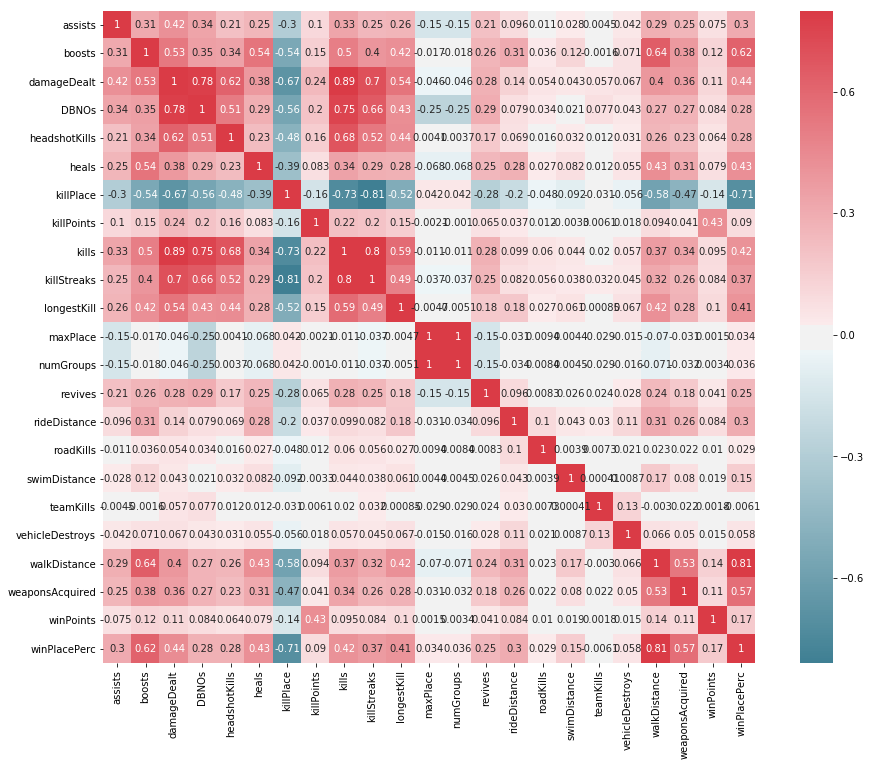

In [4]:
std = StandardScaler()

target = train_data['winPlacePerc']

for data in full_data:
    data.drop(['Id','groupId','matchId'], axis = 1, inplace = True)
    
matrix = train_data.corr()

colormap = sns.diverging_palette(220,10, as_cmap=True)

fig, ax2 = plt.subplots(figsize=[16,12])

sns.heatmap(matrix, cmap = colormap, vmax = 0.8, square = True, annot = True)
    
train_data.drop('winPlacePerc', axis = 1, inplace = True)

train = std.fit_transform(train_data)

train_data = pd.DataFrame(train, columns = train_data.columns)

test = std.transform(test_data)

test_data = pd.DataFrame(test, columns = test_data.columns)

print(train_data.sample(10))

print(test_data.sample(10))

# Feature importances and feature selection

In [ ]:
cv = model_selection.ShuffleSplit(n_splits=10, test_size=0.2, train_size=0.8, random_state=0)

rfc = ensemble.RandomForestRegressor(random_state=0)

rfc.fit(train_data, target)

ind = np.argsort(rfc.feature_importances_)[::-1]

print("Feature importances :\n")

for i in range(train_data.shape[1]):
    print(train_data.columns[ind[i]], rfc.feature_importances_[ind[i]])
    
#Removing some variables based on the information from feature importances and heat maps

for data in full_data:
    data.drop(['teamKills','roadKills','vehicleDestroys','kills','DBNOs'], axis=1, inplace=True)

# Data Modelling

After modelling the data with different algorithms at their default parameters, I pick the top 3-4 performers and tune their hyperparameters to improve the performance of the model.

In [ ]:
#Splitting into training and cross validation datasets
x_train, x_cv, y_train, y_cv = model_selection.train_test_split(train_data, target, test_size=0.2, random_state=0)

print("\nStarting the modelling\n")

MLA = [linear_model.LinearRegression(random_state=0),
       linear_model.Lasso(random_state=0),
       linear_model.Ridge(random_state=0),
       tree.DecisionTreeRegressor(random_state=0),
       ensemble.RandomForestRegressor(random_state=0),
       ensemble.GradientBoostingRegressor(random_state=0),
       xgb.XGBRegressor(random_state=0)]

for alg in MLA:
    cv_results = model_selection.cross_validate(alg, x_train, y_train, scoring = 'neg_mean_absolute_error', cv=cv)
    print(alg.__class__.__name__)
    print("\nTrain Score: ",cv_results['train_score'].mean())
    print("\nTest Score: ", cv_results['test_score'].mean())
    print("\nTest Score STD: ", cv_results['test_score'].std())
    alg.fit(x_train,y_train)
    predict = alg.predict(x_cv)
    print("\nCV Score: ",metrics.mean_absolute_error(y_cv,predict))

# Tuning Hyperparameters

From the above modelling, 3 algorithms viz. Random Forest, Gradient Boosting, and XGboost gave better results compared to the rest. So we'll deal with tuning the hyperparameters for these algorithms. Randomized Search is used here to find the best set of hyperparameters as it gives better results in less time. Given that tuning the hyperparameters consume a lot of time, we can start by tuning a few parameters at the beginning and the perform the randomized search again over the previous results.

In [ ]:
algos = [ensemble.RandomForestRegressor(random_state=0),
       ensemble.GradientBoostingRegressor(random_state=0),
       xgb.XGBRegressor(random_state=0)]

grid_param = [
            [{
                'n_estimators': [50,100,150,200],
                'criterion': ['gini','entropy'],
                'max_depth': [2,4,6,8,10],
                'min_samples_leaf': [20,40,60,80],
                'max_features' : ['auto','sqrt','log2',0.3],
                'oob_score': [True,False]}],
            [{
                    'n_estimators': [50, 100, 150, 200],
                    'max_depth': [4],
                    'learning_rate' : [0.05,0.1,0.15],
                    'min_samples_split': [6,8,10],
                    'max_features' : [1.0],
                    'subsample' : [1.0]}],
            [{
                    'n_estimators': [50, 100, 150, 200],
                    'max_depth': [3,4,5],
                    'min_child_weight' : [2,3,4],
                    'learning_rate' : [0.05,0.1,0.15],
                    'colsample_bytree' : [1.0],
                    'subsample' : [1.0],
                    'gamma' : [0.0,0.1,0.2,0.3]}]
            ]   

for alg, param in zip(algos,grid_param):
    rand_search = model_selection.RandomizedSearchCV(alg,param_distributions = param, cv = cv, n_iter = 20, scoring = 'neg_mean_absolute_error')
    rand_search.fit(x_train, y_train)
    print(alg.__class__.__name__)
    print(rand_search.best_params_)
    rand_search.best_estimator_.fit(x_train,y_train)
    predict = rand_search.best_estimator_.predict(x_cv)
    print("\n New CV Score: ", metrics.mean_absolute_error(y_cv,predict))

After tuning the algorithms, build the model using the parameter set that gives the highest CV score and then apply it on the test set to obtain the required win percentages

As a part of preprocessing the data, we can also peform the discretization of the continuous data which sometimes gives better results.